In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
heartdisease= pd.read_csv("heart_v2.csv")
heartdisease.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
heartdisease["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

#####  Train-test-split

In [5]:
X= heartdisease.drop("heart disease", axis= 1)
y=heartdisease["heart disease"]

In [6]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.70, random_state= 100)

In [9]:
X_train.shape

(189, 4)

In [10]:
y_train.shape

(189,)

### Building the decision tree
use all parameters except depth

In [11]:
dt= DecisionTreeClassifier(max_depth= 3)

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

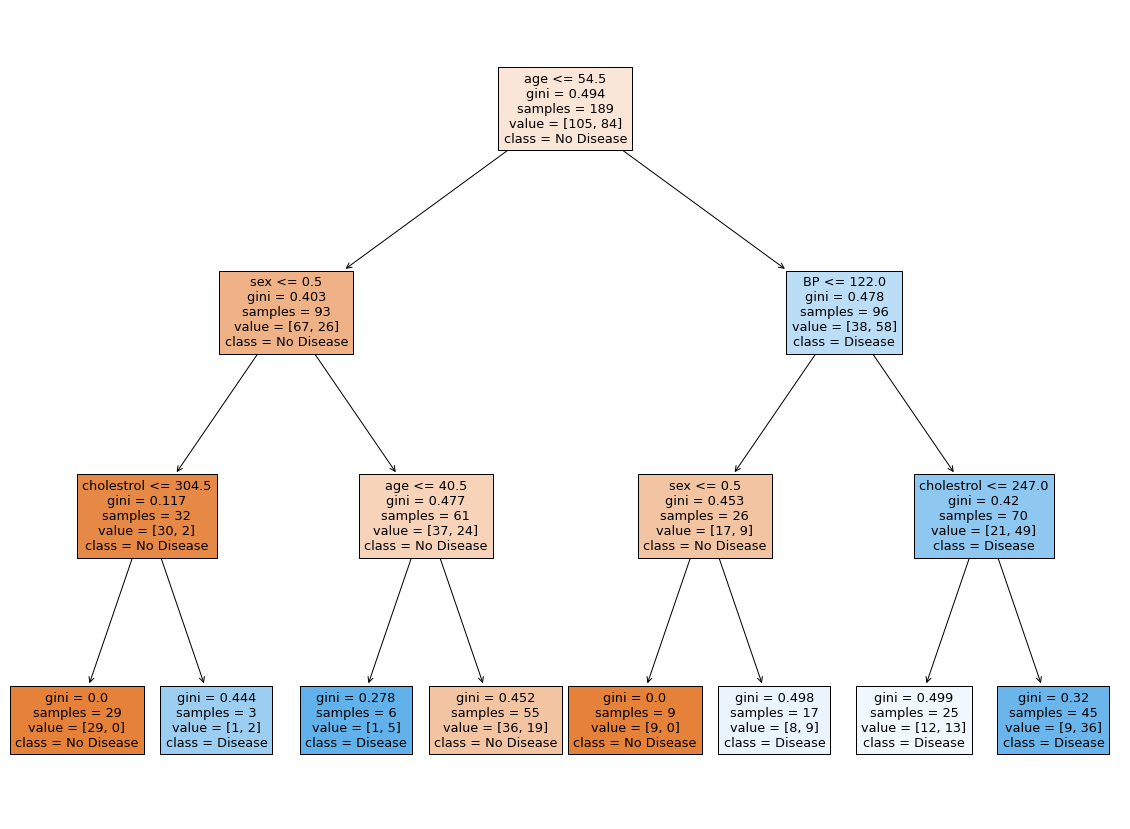

In [13]:
plt.rcParams["figure.figsize"]= (20,15)
plot_tree(dt, feature_names= X.columns, class_names=["No Disease", "Disease"], filled= True)
plt.show()

#####  Evaluate the model performance

In [14]:
y_train_pred= dt.predict(X_train)
y_test_pred= dt.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
print(accuracy_score(y_train, y_train_pred))

0.7354497354497355


In [17]:
confusion_matrix(y_train, y_train_pred)

array([[74, 31],
       [19, 65]], dtype=int64)

In [18]:
accuracy_score(y_test, y_test_pred)

0.5432098765432098

In [19]:
confusion_matrix(y_test, y_test_pred)

array([[22, 23],
       [14, 22]], dtype=int64)

## Experimenting with metrics

#### No Metrics 

In [20]:
dt_no_metrics=DecisionTreeClassifier()

In [21]:
dt_no_metrics.fit(X_train, y_train)

DecisionTreeClassifier()

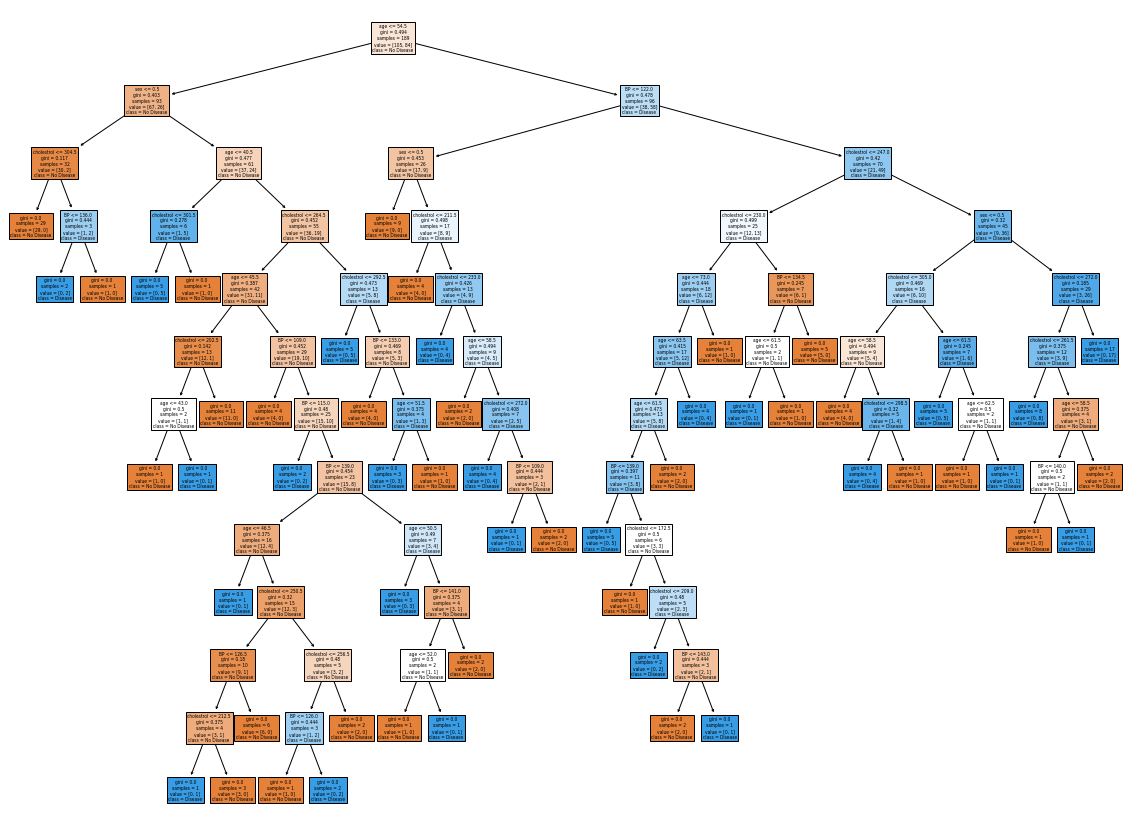

In [22]:
plot_tree(dt_no_metrics, feature_names= X.columns, class_names=["No Disease", "Disease"], filled= True)
plt.show()

In [23]:
y_train_pred=dt_no_metrics.predict(X_train)
y_test_pred= dt_no_metrics.predict(X_test)

In [24]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
1.0
[[105   0]
 [  0  84]]
--------------------------------------------------
test set performance
0.5432098765432098
[[22 23]
 [14 22]]


#### Limiting the depth of the tree

In [25]:
dt_depth_limit= DecisionTreeClassifier(max_depth= 3, random_state= 42)
dt_depth_limit.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

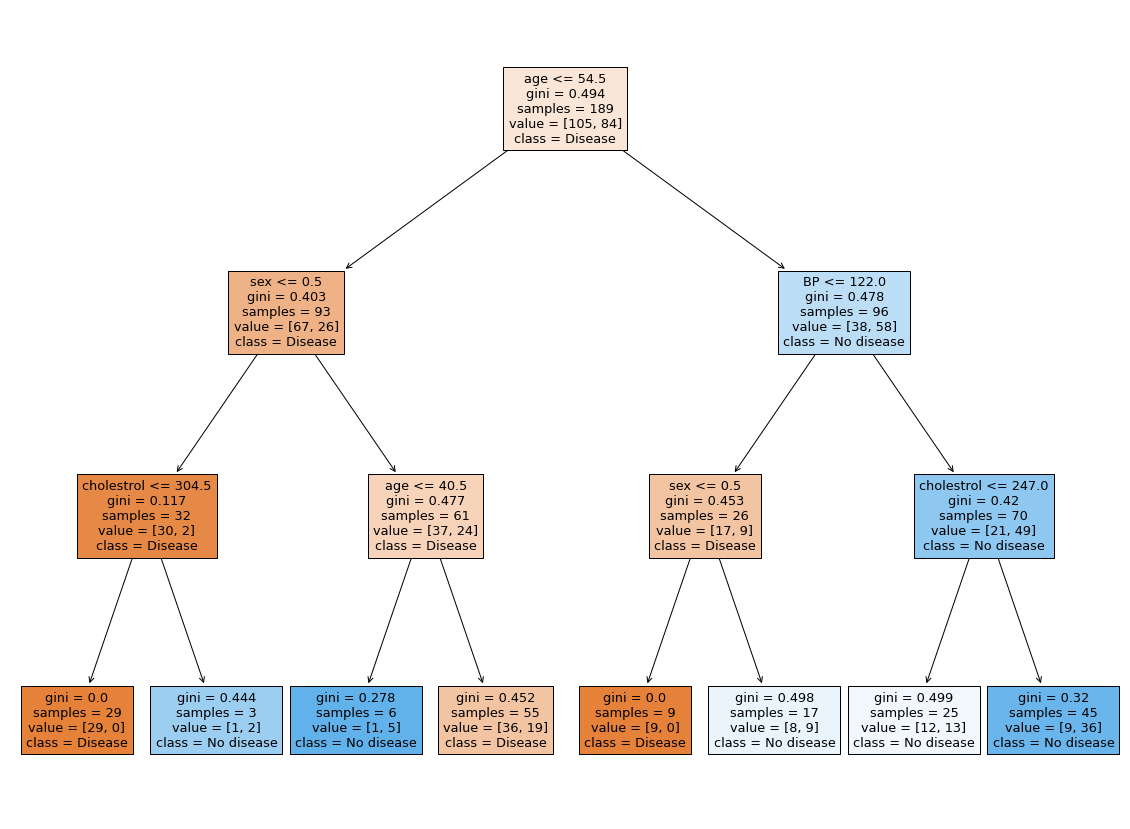

In [26]:
plot_tree(dt_depth_limit, feature_names= X.columns, class_names= ["Disease", "No disease"], filled= True)
plt.show()

In [27]:
y_train_pred= dt_depth_limit.predict(X_train)
y_test_pred= dt_depth_limit.predict(X_test)

In [28]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
0.7354497354497355
[[74 31]
 [19 65]]
--------------------------------------------------
test set performance
0.5432098765432098
[[22 23]
 [14 22]]


#### specifying the number of samples before the split

In [29]:
dt_min_split= DecisionTreeClassifier(min_samples_split=20, random_state= 42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

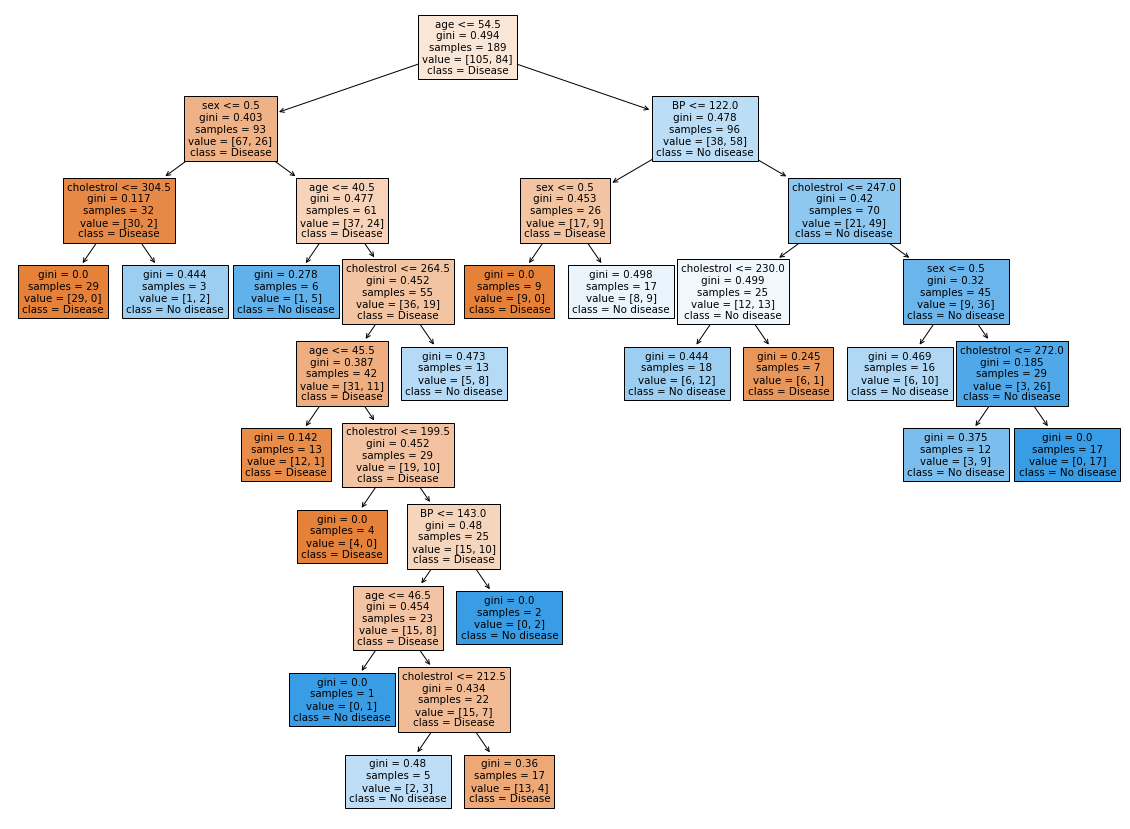

In [30]:
plot_tree(dt_min_split,feature_names= X.columns, class_names= ["Disease", "No disease"], filled= True )
plt.show()

In [31]:
y_train_pred= dt_min_split.predict(X_train)
y_test_pred= dt_min_split.predict(X_test)

In [32]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
0.798941798941799
[[73 32]
 [ 6 78]]
--------------------------------------------------
test set performance
0.5308641975308642
[[18 27]
 [11 25]]


#### Specifying the minimum samoles in the leaf node

In [33]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state= 42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

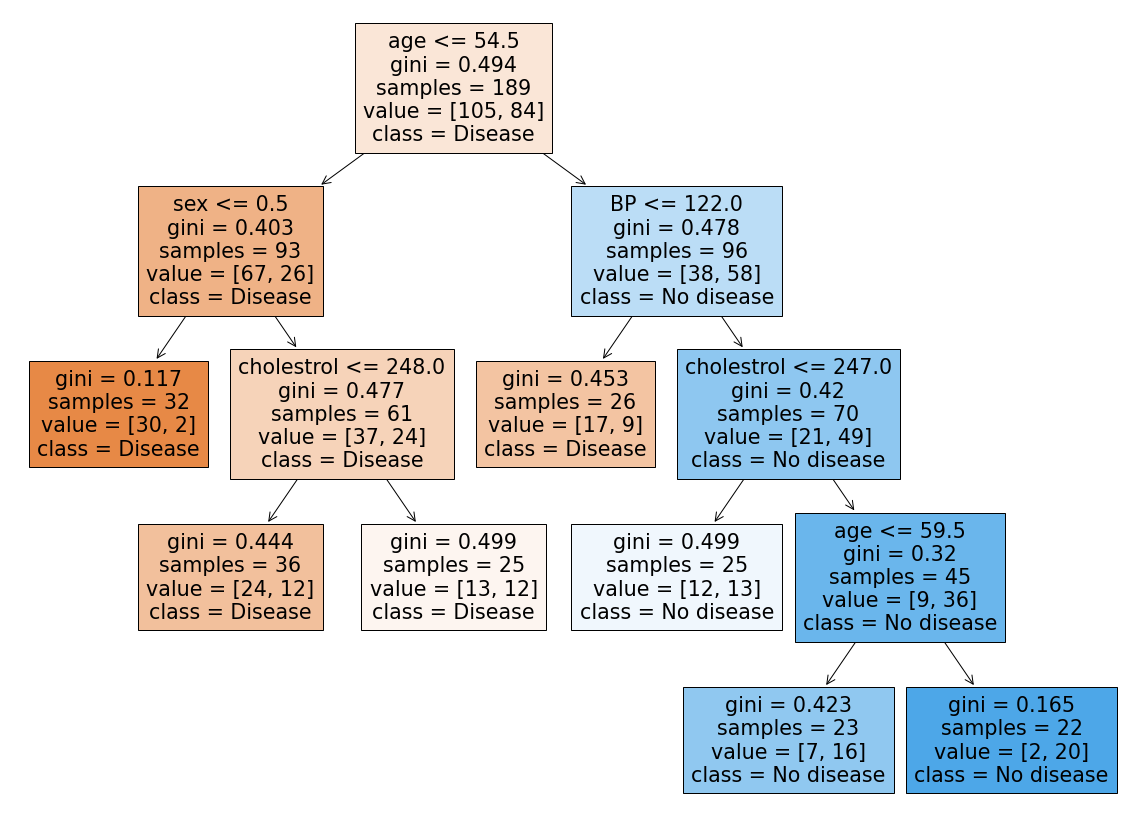

In [34]:
plot_tree(dt_min_leaf,feature_names= X.columns, class_names= ["Disease", "No disease"], filled= True )
plt.show()

### hyper-parameter tuning using grid-search CV 

In [35]:
dt_new= DecisionTreeClassifier(random_state= 42)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parama= {"max_depth":[2,3,5,10,20], "min_samples_leaf": [5,10,20,50,100], "criterion":["gini", "entropy"]}

In [38]:
%%time
grid_search= GridSearchCV(estimator= dt_new,
                          param_grid= parama,
                          cv=4,
                          n_jobs=1,
                          verbose=1,
                          scoring= "accuracy")

Wall time: 0 ns


In [39]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 846 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.00275081, 0.00200021, 0.00225079, 0.00200021, 0.00200021,
        0.00250155, 0.00200009, 0.00200164, 0.00225067, 0.00224954,
        0.00249976, 0.00199991, 0.00200009, 0.00199974, 0.00200033,
        0.00199968, 0.00200033, 0.00225145, 0.00200021, 0.00200009,
        0.0025    , 0.00250024, 0.00300032, 0.00325137, 0.00250024,
        0.00325096, 0.00250006, 0.0025062 , 0.00200301, 0.00249988,
        0.00225234, 0.00250208, 0.00250089, 0.00200307, 0.00250334,
        0.00225341, 0.00249982, 0.00225174, 0.00225145, 0.00199944,
        0.00300395, 0.0022487 , 0.00200397, 0.00225133, 0.0022521 ,
        0.00249869, 0.00225055, 0.0022496 , 0.0024994 , 0.00225079]),
 'std_fit_time': array([4.33299986e-04, 3.95372485e-07, 4.33256696e-04, 1.19209290e-07,
        4.91512492e-07, 5.02191552e-04, 4.76837158e-07, 3.24503364e-06,
        4.32639073e-04, 4.34532933e-04, 5.00506172e-04, 4.87885044e-07,
        2.38418579e-07, 7.05251668e-07, 5.05762182e-07, 6.16555240e-0

In [41]:
df1= pd.DataFrame(grid_search.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002751,4.333000e-04,0.001249,4.341233e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.625000,0.553191,0.659574,0.638298,0.619016,0.039955,10
1,0.002000,3.953725e-07,0.001000,4.256623e-07,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.625000,0.595745,0.659574,0.617021,0.624335,0.022985,8
2,0.002251,4.332567e-04,0.001250,4.329126e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.604167,0.574468,0.617021,0.617021,0.603169,0.017382,14
3,0.002000,1.192093e-07,0.001000,1.032383e-07,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.574468,0.638298,0.659574,0.598293,0.054597,19
4,0.002000,4.915125e-07,0.001501,5.008599e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.562500,0.553191,0.553191,0.553191,0.555519,0.004031,37


In [42]:
df1.shape

(50, 15)

In [43]:
df1.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,0.002000,6.165552e-07,0.001000,5.430242e-07,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.583333,0.702128,0.659574,0.659574,0.651152,0.042836,1
20,0.002500,4.997857e-04,0.001250,4.336701e-04,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.583333,0.702128,0.659574,0.659574,0.651152,0.042836,1
40,0.003004,3.373855e-06,0.001247,4.293346e-04,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.708333,0.595745,0.638298,0.659574,0.650488,0.040540,3
45,0.002499,5.010965e-04,0.001252,4.357345e-04,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.708333,0.595745,0.638298,0.659574,0.650488,0.040540,3
35,0.002253,4.315035e-04,0.001497,4.962804e-04,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.708333,0.531915,0.659574,0.638298,0.634530,0.064456,5


In [44]:
 grid_search.best_score_

0.6511524822695035

In [45]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [46]:
dt_best= grid_search.best_estimator_

In [47]:
y_train_pred=dt_best.predict(X_train)
y_test_pred=dt_best.predict(X_test)

In [48]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
0.8306878306878307
[[98  7]
 [25 59]]
--------------------------------------------------
test set performance
0.5555555555555556
[[31 14]
 [22 14]]


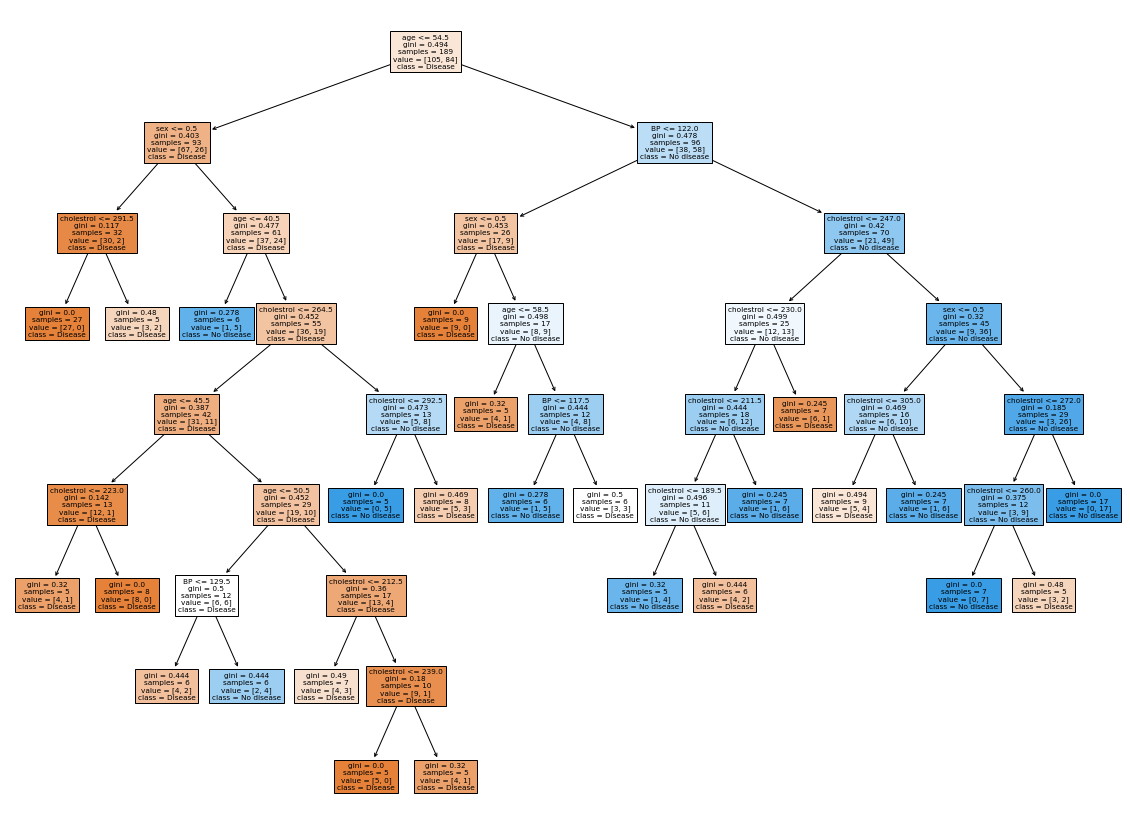

In [49]:
plot_tree(dt_best, feature_names= X.columns, class_names= ["Disease", "No disease"], filled= True)
plt.show()

## Using random Forest Models 

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
X_train.head()

,age,sex,BP,cholestrol
55,41,0,105,198
22,43,1,115,303
200,68,1,118,277
11,53,1,142,226
15,71,0,112,149


In [52]:
y_train.head()

55     0
22     0
200    0
11     0
15     0
Name: heart disease, dtype: int64

In [53]:
rf= RandomForestClassifier(random_state= 42, max_depth= 3, n_estimators=10)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [55]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [56]:
 sample_tree= rf.estimators_[4]

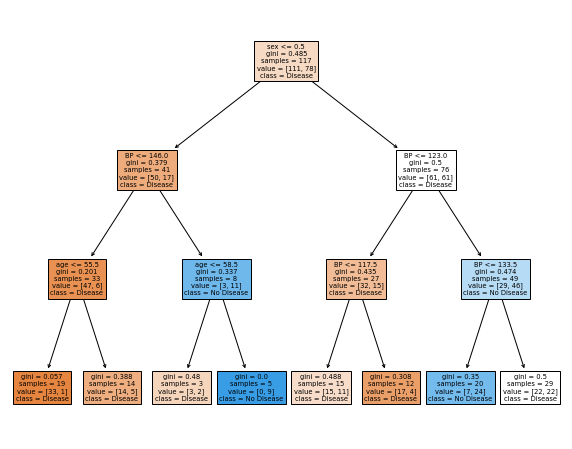

In [57]:
plt.rcParams["figure.figsize"]= (10,8)
plot_tree(sample_tree, feature_names= X.columns, class_names=["Disease", "No Disease"], filled= True)
plt.show()

In [58]:
sample_tree1= rf.estimators_[1]

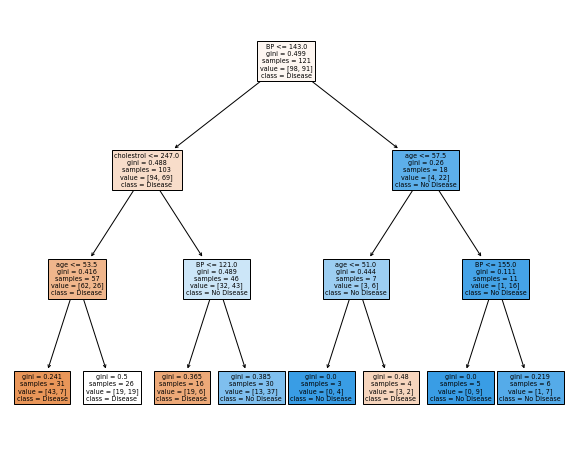

In [59]:
plot_tree(sample_tree1, feature_names= X.columns, class_names=["Disease", "No Disease"], filled= True)
plt.show()

### OOB Score

In [60]:
rf= RandomForestClassifier(random_state= 42, max_depth=3,n_estimators=10, oob_score= True)

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [62]:
rf.oob_score_

0.6666666666666666

#### Using GridSearchCV 

In [63]:
rf_classifier= RandomForestClassifier(random_state= 42, n_jobs=-1)

In [64]:
params= {"max_depth":[1,2,5,10,20],
        "min_samples_leaf": [5,10,20,50,100],
        "max_features": [2,3,4],
        "n_estimators":[10,30,50,100,200]}

In [65]:
#instatntiate the gridsearchcv
grid_search= GridSearchCV(estimator= rf_classifier, param_grid= params, cv=4, n_jobs= -1, verbose=1, scoring= "accuracy")

In [66]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 1min


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [67]:
rf_best1= grid_search.best_estimator_

In [68]:
rf_best1

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [69]:
y_train_pred=rf_best1.predict(X_train)
y_test_pred= rf_best1.predict(X_test)

In [70]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
0.7883597883597884
[[86 19]
 [21 63]]
--------------------------------------------------
test set performance
0.8395061728395061
[[43  2]
 [11 25]]


## variable importance in randomforest and decisiontrees

In [71]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [72]:
rf_classifier.feature_importances_

array([0.31267674, 0.1138176 , 0.26105461, 0.31245105])

In [73]:
importance_dataframe= pd.DataFrame({"variable_name":X_train.columns, "Imp": rf_classifier.feature_importances_})

In [74]:
importance_dataframe.nlargest(5,"Imp")

,variable_name,Imp
0,age,0.312677
3,cholestrol,0.312451
2,BP,0.261055
1,sex,0.113818


In [75]:
final_classifier=RandomForestClassifier(random_state=42, n_jobs=-1 , max_depth= 5, n_estimators= 100, oob_score= True)

In [76]:
final_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [77]:
grid_search= GridSearchCV(final_classifier, param_grid= params, n_jobs=-1, cv=4, scoring= "accuracy")

In [78]:
grid_search.fit(X,y)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy')

In [79]:
rfbest_final= grid_search.best_estimator_

In [80]:
rfbest_final

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=42)

In [81]:
rfbest_final.feature_importances_

array([0.33065969, 0.19421214, 0.16377868, 0.31134948])

In [82]:
y_train_pred= rfbest_final.predict(X_train)
y_test_pred= rfbest_final.predict(X_test)

In [83]:
print("train set performance")
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("test set performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

train set performance
0.7883597883597884
[[86 19]
 [21 63]]
--------------------------------------------------
test set performance
0.8395061728395061
[[43  2]
 [11 25]]


In [84]:
var_imp_df= pd.DataFrame({"varnames": X_train.columns, "Importance":rfbest_final.feature_importances_})

In [85]:
var_imp_df

,varnames,Importance
0,age,0.330660
1,sex,0.194212
2,BP,0.163779
3,cholestrol,0.311349


In [86]:
var_imp_df.nlargest(10, "Importance")

,varnames,Importance
0,age,0.330660
3,cholestrol,0.311349
1,sex,0.194212
2,BP,0.163779
